In [2]:
from data_loading import ChatHighlightData
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def get_hl_lens(chat_highlight_data):
    matches_hl_lengths = list()

    for name, match_data in chat_highlight_data.get_match_meta_data().items():
        if match_data["highlight_lengths"]:
            for i, (hl_start, hl_end) in enumerate(match_data["highlight_spans"]):
                matches_hl_lengths.append((name, i,hl_start, hl_end, hl_end - hl_start, (hl_end - hl_start)/30))
        else:
            print("no highlights in match: ", name)
    return matches_hl_lengths

## Chat Highlight data total

In [4]:
chd = ChatHighlightData()
chd.load_data(file_identifier="nalcs_*")

In [5]:
len(chd.chat)

218

In [9]:
chd.get_data_totals()

{'video_count': 218,
 'video_length_secs': 595657.0333333333,
 'highlight_count': 3106,
 'highlight_length_secs': 62549.333333333336,
 'highlight_min_len_frames': 9,
 'highlight_max_len_frames': 13460,
 'chat_message_count': 1733448,
 'chat_message_count_avg_video': 7951.59633027523,
 'chat_message_count_hl': 288428,
 'chat_message_count_non_hl': 1445020,
 'chat_message_count_avg_hl': 92.8615582743078,
 'highlight_length_proportion': 0.10500897300465577,
 'highlight_message_count_proportion': 0.1663897619080584}

In [106]:
# vid len
595657.03333333 / 60 / 60

165.46028703703612

In [6]:
matches_hl_lengths = get_hl_lens(chd)

no highlights in match:  nalcs_w8d3_TSM_FOX_g1
no highlights in match:  nalcs_w6d2_FLY_NV_g2
no highlights in match:  nalcs_w8d3_TSM_FOX_g2


In [11]:
matches_hl_lengths[0]

('nalcs_w7d2_P1_FOX_g1', 0, 12224, 12382, 158, 5.266666666666667)

In [7]:
hl_lens = [m[4] for m in matches_hl_lengths]

In [8]:
# highlight duration numbers
np.max(hl_lens), np.min(hl_lens),  np.mean(hl_lens), np.std(hl_lens), np.var(hl_lens)

(13459, 8, 603.1468126207341, 610.8422987365651, 373128.31392577104)

In [9]:
np.max(hl_lens)/30, np.min(hl_lens)/30,  np.mean(hl_lens)/30, np.std(hl_lens)/30, np.var(hl_lens)/30

(448.6333333333333,
 0.26666666666666666,
 20.10489375402447,
 20.361409957885503,
 12437.610464192368)

In [94]:
sum(np.asarray(hl_lens) < 1800)

2966

In [95]:
# highlights below 1 minute in length
2966/3106

0.9549259497746297

In [27]:
short_highlights_only = (np.asarray(hl_lens)/30)[np.asarray(hl_lens)/30<60]
print(np.max(short_highlights_only), 
np.min(short_highlights_only),  
np.mean(short_highlights_only), 
np.std(short_highlights_only),
np.var(short_highlights_only))

59.7 0.26666666666666666 16.942099348168128 11.926610999233796 142.24404992704459


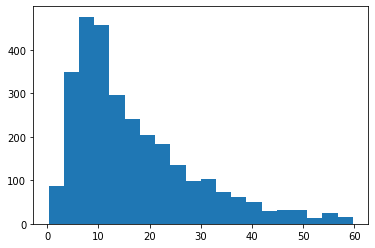

In [23]:
plt.hist((np.asarray(hl_lens)/30)[np.asarray(hl_lens)/30<60], bins=20)
plt.show()

### Avg HL count per match

In [101]:
chd.get_match_meta_data()["nalcs_w7d2_P1_FOX_g1"].keys()

dict_keys(['highlight_spans', 'highlight_lengths', 'highlight_count', 'highlight_avg_len'])

In [103]:
hl_counts = list()
for name, match_data in chd.get_match_meta_data().items():
    if match_data["highlight_count"]:
        hl_counts.append(match_data["highlight_count"])
    else:
        print("no highlights in match: ", name)


no highlights in match:  nalcs_w8d3_TSM_FOX_g1
no highlights in match:  nalcs_w6d2_FLY_NV_g2
no highlights in match:  nalcs_w8d3_TSM_FOX_g2


In [104]:
np.max(hl_counts), np.min(hl_counts),  np.mean(hl_counts), np.std(hl_counts), np.var(hl_counts)

(30, 5, 14.446511627906977, 3.6885333845492787, 13.605278528934559)

## Chat Highlight data train

In [12]:
chd_trn = ChatHighlightData()
chd_trn.load_data(file_identifier="nalcs_w*_g[13]")

In [13]:
chd_trn.get_data_totals()

{'video_count': 128,
 'video_length_secs': 352680.03333333327,
 'highlight_count': 1813,
 'highlight_length_secs': 36332.29999999998,
 'highlight_min_len_frames': 9,
 'highlight_max_len_frames': 7845,
 'chat_message_count': 1053699,
 'chat_message_count_avg_video': 8232.0234375,
 'chat_message_count_hl': 170485,
 'chat_message_count_non_hl': 883214,
 'chat_message_count_avg_hl': 94.03474903474904,
 'highlight_length_proportion': 0.1030177400648614,
 'highlight_message_count_proportion': 0.16179668007656836}

In [52]:
matches_hl_lengths_trn = get_hl_lens(chd_trn)
hl_lens_trn = [m[4] for m in matches_hl_lengths_trn]
np.max(hl_lens_trn), np.min(hl_lens_trn),  np.mean(hl_lens_trn), np.std(hl_lens_trn), np.var(hl_lens_trn)

no highlights in match:  nalcs_w8d3_TSM_FOX_g1


(7844, 8, 600.196359624931, 560.9739393864005, 314691.7606706969)

## Chat Highlight data val

In [14]:
chd_val = ChatHighlightData()
chd_val.load_data(file_identifier="nalcs_w[1-4]*_g2")

In [15]:
chd_val.get_data_totals()

{'video_count': 40,
 'video_length_secs': 110174.30000000002,
 'highlight_count': 584,
 'highlight_length_secs': 11705.199999999997,
 'highlight_min_len_frames': 30,
 'highlight_max_len_frames': 13460,
 'chat_message_count': 330148,
 'chat_message_count_avg_video': 8253.7,
 'chat_message_count_hl': 56203,
 'chat_message_count_non_hl': 273945,
 'chat_message_count_avg_hl': 96.23801369863014,
 'highlight_length_proportion': 0.10624256292075371,
 'highlight_message_count_proportion': 0.1702357730472394}

In [53]:
matches_hl_lengths_val = get_hl_lens(chd_val)
hl_lens_val = [m[4] for m in matches_hl_lengths_val]
np.max(hl_lens_val), np.min(hl_lens_val),  np.mean(hl_lens_val), np.std(hl_lens_val), np.var(hl_lens_val)

(13459, 29, 600.2945205479452, 752.8044318232427, 566714.5125727153)

## Chat Highlight data test

In [16]:
chd_tst = ChatHighlightData()
chd_tst.load_data(file_identifier="nalcs_w[5-9]*_g2")

In [17]:
chd_tst.get_data_totals()

{'video_count': 50,
 'video_length_secs': 132802.69999999998,
 'highlight_count': 709,
 'highlight_length_secs': 14511.833333333332,
 'highlight_min_len_frames': 10,
 'highlight_max_len_frames': 5015,
 'chat_message_count': 349601,
 'chat_message_count_avg_video': 6992.02,
 'chat_message_count_hl': 61740,
 'chat_message_count_non_hl': 287861,
 'chat_message_count_avg_hl': 87.08039492242595,
 'highlight_length_proportion': 0.10927363173590096,
 'highlight_message_count_proportion': 0.17660132551108262}

In [54]:
matches_hl_lengths_tst = get_hl_lens(chd_tst)
hl_lens_tst = [m[4] for m in matches_hl_lengths_tst]
np.max(hl_lens_tst), np.min(hl_lens_tst),  np.mean(hl_lens_tst), np.std(hl_lens_tst), np.var(hl_lens_tst)

no highlights in match:  nalcs_w6d2_FLY_NV_g2
no highlights in match:  nalcs_w8d3_TSM_FOX_g2


(5014, 9, 613.0409026798308, 602.4739380253301, 362974.8459997493)

## Data table for chd stats

In [83]:
data1 = chd.get_data_totals()
data1["split"] = "all"
data2 = chd_trn.get_data_totals()
data2["split"] = "trn"
data3 = chd_val.get_data_totals()
data3["split"] = "val"
data4 = chd_tst.get_data_totals()
data4["split"] = "tst"
df = pd.DataFrame.from_records([data1,data2,data3,data4])
df = df.reindex(columns=['split', 'video_count', 'video_length_secs', 'highlight_count', 'highlight_length_secs', 'highlight_min_len_frames', 'highlight_max_len_frames', 'chat_message_count', 'chat_message_count_avg_video', 'chat_message_count_hl', 'chat_message_count_non_hl', 'chat_message_count_avg_hl', 'highlight_length_proportion', 'highlight_message_count_proportion'])
df

,split,video_count,video_length_secs,highlight_count,highlight_length_secs,highlight_min_len_frames,highlight_max_len_frames,chat_message_count,chat_message_count_avg_video,chat_message_count_hl,chat_message_count_non_hl,chat_message_count_avg_hl,highlight_length_proportion,highlight_message_count_proportion
0,all,218,595657.033333,3106,62549.333333,9,13460,1733448,7951.596330,288428,1445020,92.861558,0.105009,0.166390
1,trn,128,352680.033333,1813,36332.300000,9,7845,1053699,8232.023438,170485,883214,94.034749,0.103018,0.161797
2,val,40,110174.300000,584,11705.200000,30,13460,330148,8253.700000,56203,273945,96.238014,0.106243,0.170236
3,tst,50,132802.700000,709,14511.833333,10,5015,349601,6992.020000,61740,287861,87.080395,0.109274,0.176601


In [84]:
df.to_latex()

'\\begin{tabular}{llrrrrrrrrrrrrr}\n\\toprule\n{} & split &  video\\_count &  video\\_length\\_secs &  highlight\\_count &  highlight\\_length\\_secs &  highlight\\_min\\_len\\_frames &  highlight\\_max\\_len\\_frames &  chat\\_message\\_count &  chat\\_message\\_count\\_avg\\_video &  chat\\_message\\_count\\_hl &  chat\\_message\\_count\\_non\\_hl &  chat\\_message\\_count\\_avg\\_hl &  highlight\\_length\\_proportion &  highlight\\_message\\_count\\_proportion \\\\\n\\midrule\n0 &   all &          218 &      595657.033333 &             3106 &           62549.333333 &                         9 &                     13460 &             1733448 &                   7951.596330 &                 288428 &                    1445020 &                  92.861558 &                     0.105009 &                            0.166390 \\\\\n1 &   trn &          128 &      352680.033333 &             1813 &           36332.300000 &                         9 &                      7845 &          

## Highlight example

In [4]:
example_match = chd.get_highlight_data()["nalcs_w4d3_FOX_TSM_g1"]

In [21]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]

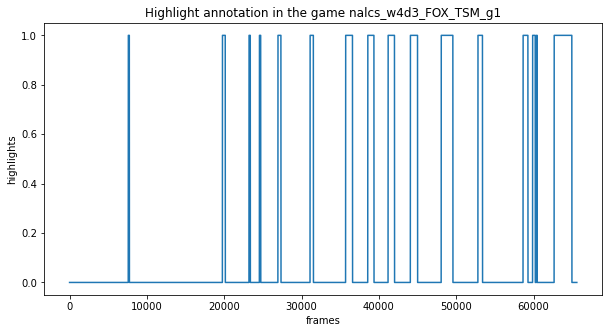

In [23]:
plt.plot(list(range(len(example_match))), example_match)
plt.title("Highlight annotation in the game nalcs_w4d3_FOX_TSM_g1")
plt.xlabel("frames")
plt.ylabel("highlights")
plt.show()

In [33]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.0
